## Indicator Analysis

In [1]:
# analysis.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
logger = SetupLogger(log_file='../logs/indicator_analysis.log').get_logger()



In [2]:
# Import functions from data_processing.py
from indicator_analysis import (
    fetch_data, clean_data, convert_to_daily, process_indicator,
    analyze_and_visualize, merge_datasets, visualize_correlation_heatmap,
    plot_time_series, plot_distributions, plot_rolling_averages, plot_pair_plots,
    INDICATORS
)



In [3]:
# Read the oil price data
price_data = pd.read_csv('../data/BrentOilPrices.csv')
price_data['Date'] = pd.to_datetime(price_data['Date'], format='mixed')
price_data.set_index('Date', inplace=True)



In [4]:
# Define date range
START_DATE = '1987-05-20'
END_DATE = '2022-11-14'

# Fetch and process all indicators
gdp_data_daily = process_indicator(INDICATORS['GDP'], 'GDP', start_date=START_DATE, end_date=END_DATE)
cpi_data_daily = process_indicator(INDICATORS['CPI'], 'CPI', start_date=START_DATE, end_date=END_DATE)
unemployment_data_daily = process_indicator(INDICATORS['Unemployment Rate'], 'Unemployment Rate', start_date=START_DATE, end_date=END_DATE)
exchange_rate_data_daily = process_indicator(INDICATORS['Exchange Rate'], 'Exchange Rate', country='EMU', start_date=START_DATE, end_date=END_DATE)

Correlation between GDP and oil prices: 0.7563009785972019


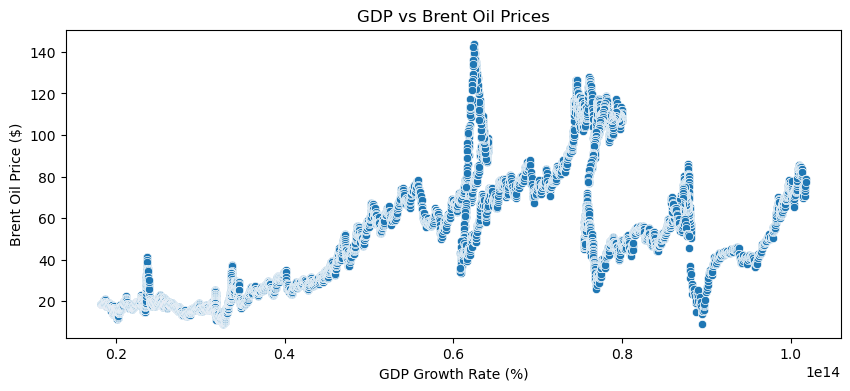

Correlation between CPI and oil prices: -0.40955574129306516


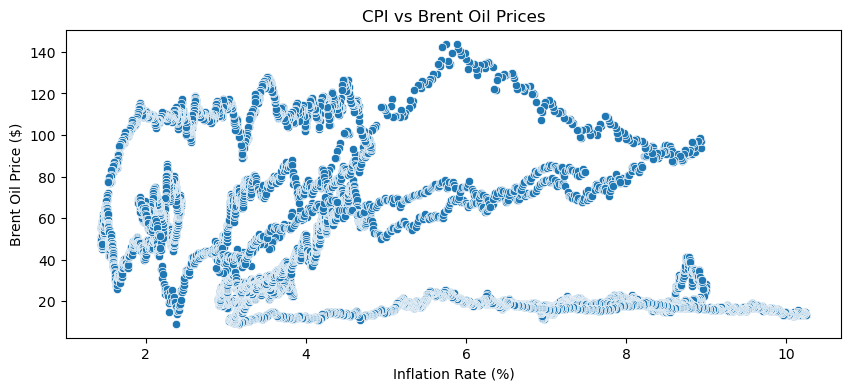

Correlation between Unemployment Rate and oil prices: 0.044698399937637336


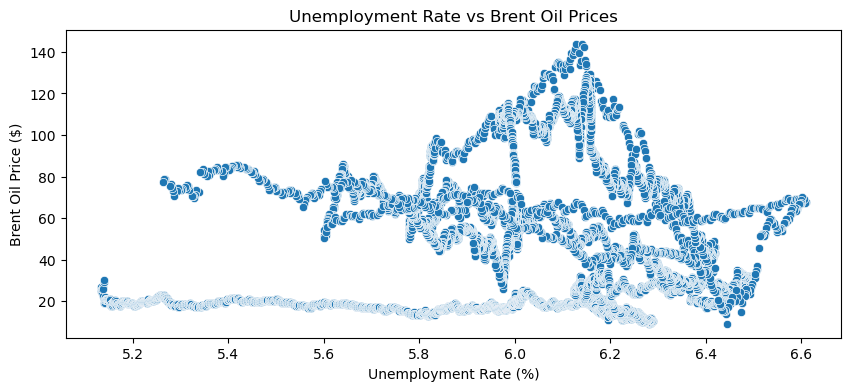

Correlation between Exchange Rate and oil prices: -0.6736337150209103


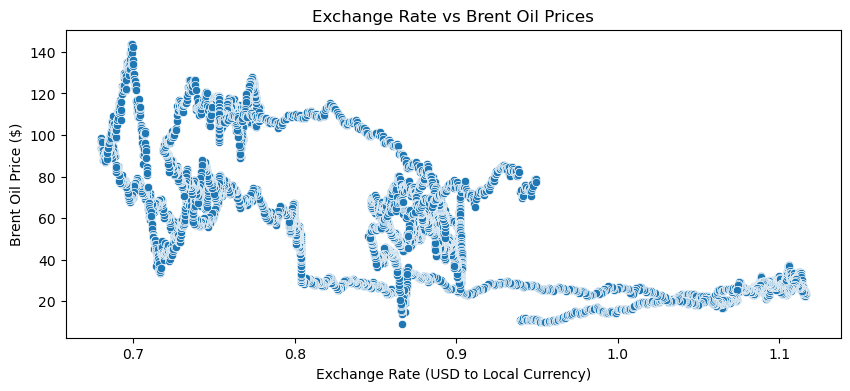

In [5]:
# Analyze and visualize all indicators
analyze_and_visualize(gdp_data_daily, 'GDP', price_data, 'GDP Growth Rate (%)')
analyze_and_visualize(cpi_data_daily, 'CPI', price_data, 'Inflation Rate (%)')
analyze_and_visualize(unemployment_data_daily, 'Unemployment Rate', price_data, 'Unemployment Rate (%)')
analyze_and_visualize(exchange_rate_data_daily, 'Exchange Rate', price_data, 'Exchange Rate (USD to Local Currency)')

In [6]:
# Merge all datasets
datasets = [gdp_data_daily, exchange_rate_data_daily, price_data.reset_index()]
merged_data = merge_datasets(datasets)


In [7]:
# Save merged data to CSV
merged_data.to_csv('../data/features.csv', index=False)

In [8]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data, columns):
    """
    Normalizes specified columns in the DataFrame to the range [0, 1].
    
    Parameters:
        data (pd.DataFrame): The input DataFrame.
        columns (list): List of column names to normalize.
    
    Returns:
        pd.DataFrame: DataFrame with normalized columns.
    """
    scaler = MinMaxScaler()
    data[columns] = scaler.fit_transform(data[columns])
    return data

In [9]:
# Normalize all columns to the range [0, 1]
columns_to_normalize = ['Price', 'Exchange Rate', 'GDP']
merged_data = normalize_data(merged_data, columns_to_normalize)

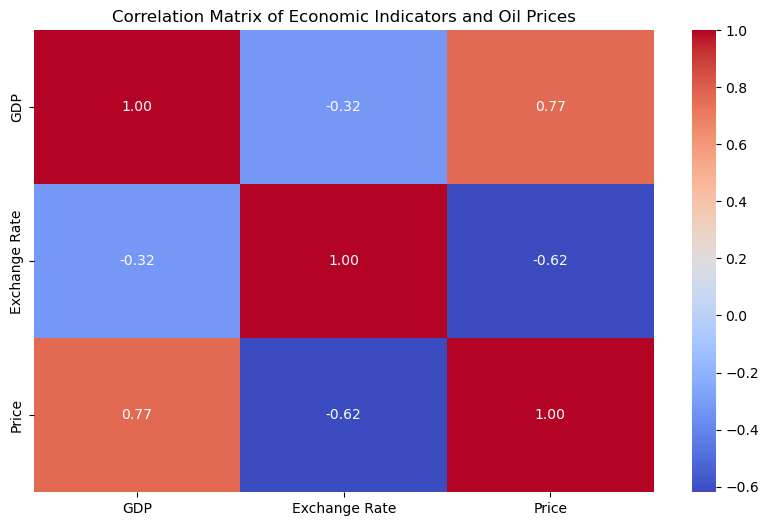

In [10]:
# Visualize correlation heatmap
visualize_correlation_heatmap(merged_data[['GDP', 'Exchange Rate', 'Price']])

In [ ]:
merged_data["GDP"].max()

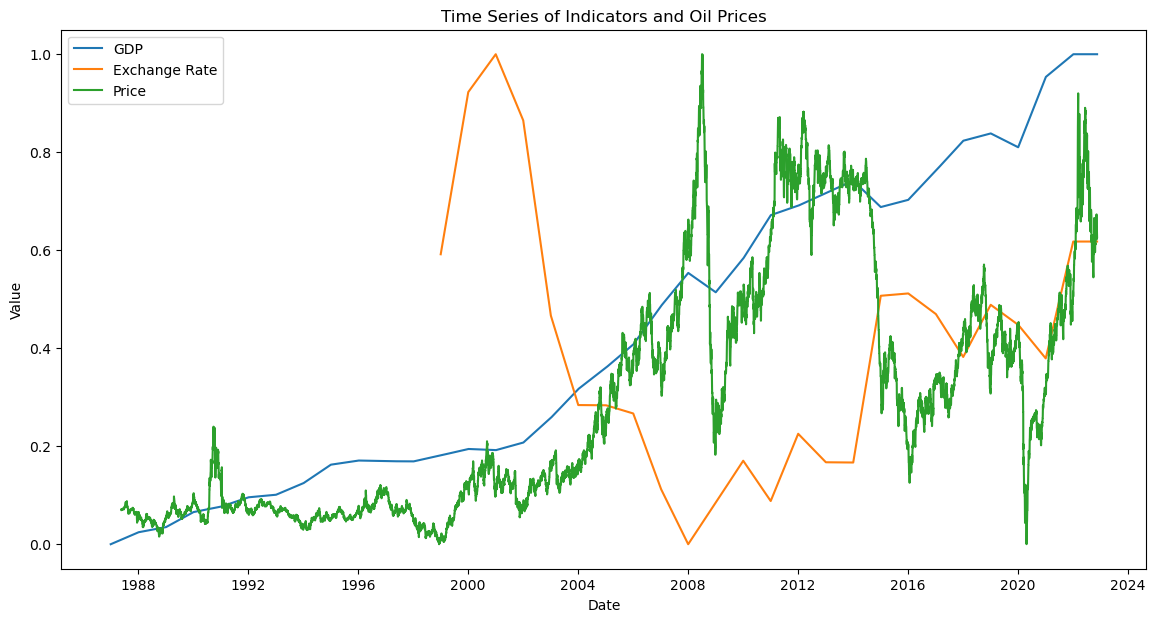

In [11]:
# Plot time series of all indicators and oil prices
plot_time_series(merged_data, 'Date', ['GDP', 'Exchange Rate', 'Price'], 'Time Series of Indicators and Oil Prices')

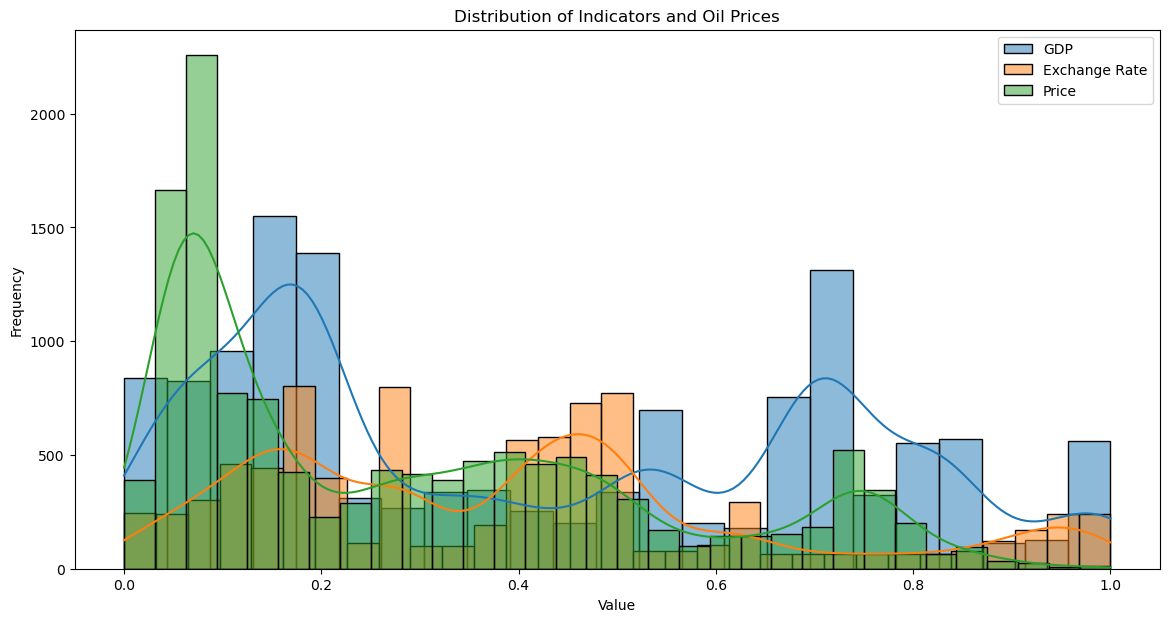

In [12]:
# Plot distributions of all indicators and oil prices
plot_distributions(merged_data, ['GDP', 'Exchange Rate', 'Price'])


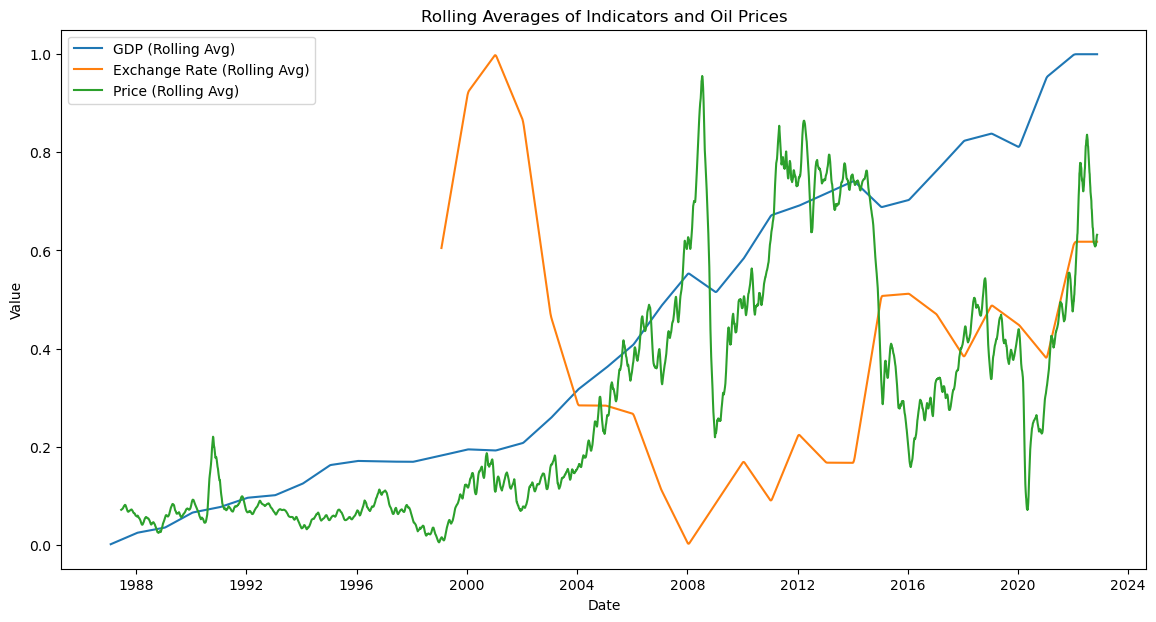

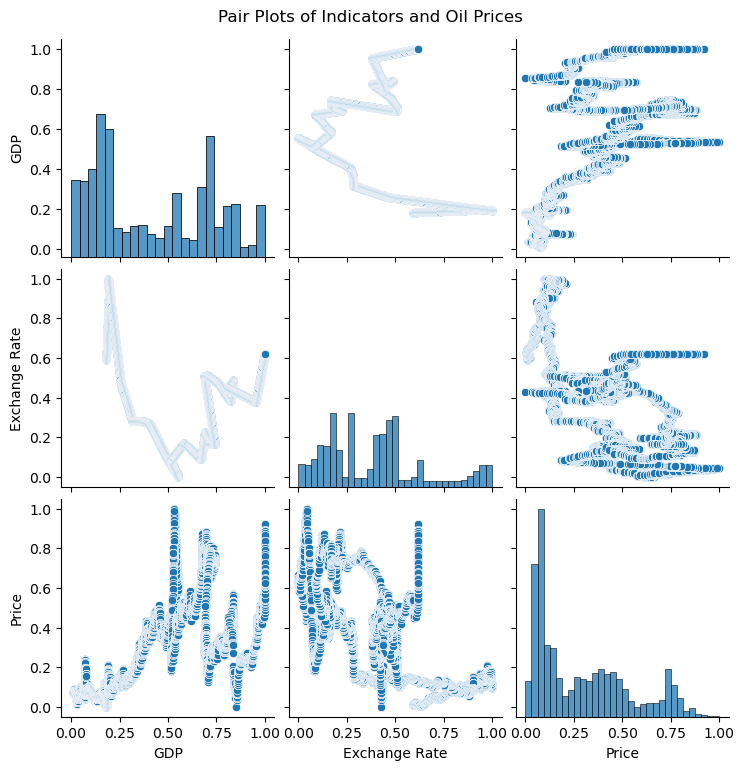

In [13]:
# Plot rolling averages of all indicators and oil prices
plot_rolling_averages(merged_data, 'Date', ['GDP', 'Exchange Rate', 'Price'], window=30, title='Rolling Averages of Indicators and Oil Prices')

# Plot pair plots of all indicators and oil prices
plot_pair_plots(merged_data, ['GDP', 'Exchange Rate', 'Price'])